<a href="https://colab.research.google.com/github/NathanH-VCU/Access-Twitter-API/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
# online tutorial followed: https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import io
import tensorflow
url = 'https://raw.githubusercontent.com/NathanH-VCU/Access-Twitter-API/main/src/amazon_baby_edited.csv'
df = pd.read_csv(url)
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [49]:
df['sentiments'] = df.rating.apply(lambda x: 0 if x in [1, 2] else 1)
df.head()

,name,review,rating,sentiments
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,1
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1


In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [51]:
#Keep 90% of data for training and 10% for test

split = round(len(df)*0.8)
train_reviews = df['review'][:split]
train_label = df['sentiments'][:split]
test_reviews = df['review'][split:]
test_label = df['sentiments'][split:]

In [52]:
import numpy as np
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

In [53]:
vocab_size = 40000 # vocab_size 40,000 means we will take 40,000 unique words to train the network
embedding_dim = 16 # each word will be represented by a 16-dimensional vector
max_length = 120 # 120 words from each review
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [54]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [55]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,       input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [57]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           640000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 640,109
Trainable params: 640,109
Non-trainable params: 0
_________________________________________________________________


In [59]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [60]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
1228/1228 [==============================] - 9s 7ms/step - loss: 0.4270 - accuracy: 0.8347 - val_loss: 0.3421 - val_accuracy: 0.8506
Epoch 2/20
1228/1228 [==============================] - 8s 7ms/step - loss: 0.2790 - accuracy: 0.8779 - val_loss: 0.2434 - val_accuracy: 0.8938
Epoch 3/20
1228/1228 [==============================] - 8s 6ms/step - loss: 0.2182 - accuracy: 0.9088 - val_loss: 0.2320 - val_accuracy: 0.9022
Epoch 4/20
1228/1228 [==============================] - 8s 6ms/step - loss: 0.1949 - accuracy: 0.9199 - val_loss: 0.2309 - val_accuracy: 0.9025
Epoch 5/20
1228/1228 [==============================] - 8s 7ms/step - loss: 0.1778 - accuracy: 0.9281 - val_loss: 0.2340 - val_accuracy: 0.9013
Epoch 6/20
1228/1228 [==============================] - 8s 6ms/step - loss: 0.1642 - accuracy: 0.9342 - val_loss: 0.2377 - val_accuracy: 0.9017
Epoch 7/20
1228/1228 [==============================] - 8s 7ms/step - loss: 0.1517 - accuracy: 0.9409 - val_loss: 0.2457 - val_accuracy:

<Figure size 432x288 with 0 Axes>

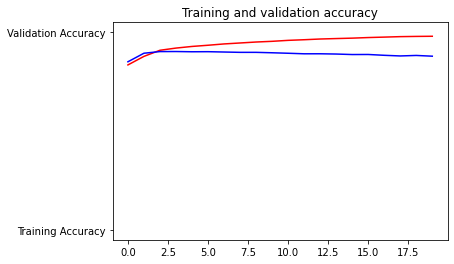

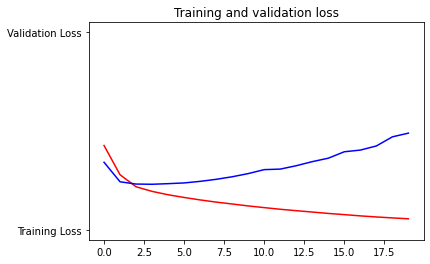

<Figure size 432x288 with 0 Axes>

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()